# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns
import sys
import json
import random
import datetime
import csv
import os
import json
import scipy.stats as st
from scipy.stats import sem
import datetime as dt
import math
import matplotlib.animation as animation


# Import API key
sys.path.append('..')
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
# The numbers are in decimal degrees format and range 
# from -90 to 90 for latitude and -180 to 180 for longitude.
lat_MAX = 90
lat_MIN = -90
lng_MAX = 180
lng_MIN = -180

In [2]:
# create empty latitude and longitude coordinates list
# create empty cities list 
lats_longs_list = []
cities = []

In [3]:
# using numpy.random.uniform() to
# generate array of 1800 random latitutes
latitudes = np.random.uniform(lat_MIN, lat_MAX, size = 1800)

# using numpy.random.uniform() to
# generate array of 1800 random latitudes
longitudes = np.random.uniform(lng_MIN, lng_MAX, size = 1800)


# order of zip based on worldcities.csv
def merge(latitudes, longitudes):
    merged_coordinates = [(latitudes[i],longitudes[i]) for i in range(0,len(latitudes))]
    return merged_coordinates

# print(merge(latitudes, longitudes)).head(5)
merged_random_coordinates = merge(latitudes, longitudes)

merged_random_coordinates

[(71.12316482435077, -100.23069081500759),
 (-44.70623994926153, 84.75582585334303),
 (37.84835323206586, 155.48028786452443),
 (24.77741658306239, -48.82105314631775),
 (-45.932746095670936, -111.3307248709337),
 (19.490118854490888, -59.40155771779625),
 (-62.18392704813802, 68.13225065788822),
 (-49.85864835460002, 136.07558604073904),
 (-45.942996901813075, 151.6431450975074),
 (-2.4323038281897738, 36.71663625014321),
 (49.87898876061931, -11.571848748189723),
 (-39.93574932587314, 26.278533216111555),
 (79.42248291330804, 7.595815862001757),
 (24.50695188883948, 61.59620939162548),
 (-13.638301546451359, 17.482775008186252),
 (-45.59566948823026, 144.17492675850713),
 (-33.08568673697395, 22.313576557376166),
 (79.70879353500098, -94.80496812174718),
 (46.11573393915458, 172.2290312164787),
 (81.13706608062995, 17.249649770406336),
 (41.79963566764235, 39.496914329668044),
 (-7.280978657390321, 68.74271503402085),
 (-57.23284929125994, 82.9299907694683),
 (-52.394175205143135, 78

In [4]:
# using citypy to Look for nearest city with geo coordinates.

# iterate through each latitude and longitue pair from random_cooridinaetes
for i in merged_random_coordinates:
    # set city name based on citypy's funcion .nearest_city() to return
    # closest city based on current iteration's latitude and longitude
    # tuple in random_coordinates
        
    city = citipy.nearest_city(i[0], i[1]).city_name
    
    # If the city returned during the 
    # current iteration, is not currently in
    # the list cities, then the city will be added to cities
    if city not in cities:
        cities.append(city)

In [5]:
# verify cities were added to the list cities
cities

['thompson',
 'busselton',
 'sentyabrskiy',
 'codrington',
 'rikitea',
 'saint-philippe',
 'portland',
 'hobart',
 'namanga',
 'dingle',
 'port elizabeth',
 'barentsburg',
 'jiwani',
 'menongue',
 'new norfolk',
 'oudtshoorn',
 'nikolskoye',
 'longyearbyen',
 'akcaabat',
 'hithadhoo',
 'mahebourg',
 'chokurdakh',
 'jamestown',
 'luanda',
 'harper',
 'carnarvon',
 'tuatapere',
 'georgetown',
 'mataura',
 'wake forest',
 'port-gentil',
 'kapaa',
 'saskylakh',
 'punta arenas',
 'ushuaia',
 'ribeira do pombal',
 'piltene',
 'saint-augustin',
 'russell',
 'palabuhanratu',
 'arraial do cabo',
 'castro',
 'bluff',
 'likasi',
 'pisco',
 'pindiga',
 'cururupu',
 'san-pedro',
 'yellowknife',
 'kodiak',
 'tukrah',
 'guerrero negro',
 'port alfred',
 'medicine hat',
 'tasiilaq',
 'kamenskoye',
 'east london',
 'albany',
 'skalistyy',
 'chaa-khol',
 'sisimiut',
 'ganzhou',
 'kudahuvadhoo',
 'hermanus',
 'puerto ayora',
 'mar del plata',
 'barrow',
 'redmond',
 'penzance',
 'husavik',
 'taolanaro',


In [6]:
# Print the city count 
print(len(cities))

673


## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
test_run = cities[1]
test_run

'busselton'

In [8]:
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}&units={units}

In [9]:
#perform API calls to check the weather of each city in our list

#set url
url = "http://api.openweathermap.org/data/2.5/weather?&q="

# Build query URL
units = "imperial"
rest_url = "&appid=" + weather_api_key + "&units=" + units

In [10]:
# test api response for one city
test_response = requests.get(url + test_run + rest_url).json()
test_response

{'coord': {'lon': 115.3333, 'lat': -33.65},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 62.04,
  'feels_like': 61.66,
  'temp_min': 60.08,
  'temp_max': 62.04,
  'pressure': 1031,
  'humidity': 79,
  'sea_level': 1031,
  'grnd_level': 1031},
 'visibility': 10000,
 'wind': {'speed': 7.45, 'deg': 288, 'gust': 11.27},
 'clouds': {'all': 93},
 'dt': 1628740777,
 'sys': {'type': 2,
  'id': 2020551,
  'country': 'AU',
  'sunrise': 1628722845,
  'sunset': 1628761614},
 'timezone': 28800,
 'id': 2075265,
 'name': 'Busselton',
 'cod': 200}

In [11]:
# Create empty lists to hold desired information

City_latitude=[]
City_longitude=[] 
Max_temperature=[]
Humidity=[]
Cloud_coverage=[]
Wind_speed=[]
City_country=[]
City_datetime=[]
Verfied_Cities = []


In [12]:
# create variables for set counters
counter = 0
set_counter = 1

# For statement to iterate through cities list to populate Verfied_Cities using
# Try and Except statement to handle any cities that 
# return "{'cod': '404', 'message': 'city not found'}" and exclude from
# Verified_Cities and returning "City not found. Skipping request..."
# on successfull responses, the desired information is added to its respective list

print("------------------------------\nBeginning Data Retrieval\n------------------------------")
for i in cities:
    try:
        response = requests.get(url + i + rest_url).json()
        Cloud_coverage.append(response['clouds']['all'])
        City_country.append(response['sys']['country'])
        Humidity.append(response['main']['humidity'])
        City_latitude.append(response['coord']['lat'])
        City_longitude.append(response['coord']['lon'])
        Max_temperature.append(response['main']['temp_max'])
        Wind_speed.append(response['wind']['speed'])
        City_datetime.append(response['dt'])

        if counter > 48:
            counter = 1
            set_counter += 1
            Verfied_Cities.append(i)
        else:
            counter += 1
            Verfied_Cities.append(i)
        print(f"Processing Record # : {counter} of Set {set_counter} | {i}")
    except:
        print("City not found. Skipping request...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

------------------------------
Beginning Data Retrieval
------------------------------
Processing Record # : 1 of Set 1 | thompson
Processing Record # : 2 of Set 1 | busselton
City not found. Skipping request...
Processing Record # : 3 of Set 1 | codrington
Processing Record # : 4 of Set 1 | rikitea
Processing Record # : 5 of Set 1 | saint-philippe
Processing Record # : 6 of Set 1 | portland
Processing Record # : 7 of Set 1 | hobart
Processing Record # : 8 of Set 1 | namanga
Processing Record # : 9 of Set 1 | dingle
Processing Record # : 10 of Set 1 | port elizabeth
City not found. Skipping request...
Processing Record # : 11 of Set 1 | jiwani
Processing Record # : 12 of Set 1 | menongue
Processing Record # : 13 of Set 1 | new norfolk
Processing Record # : 14 of Set 1 | oudtshoorn
Processing Record # : 15 of Set 1 | nikolskoye
Processing Record # : 16 of Set 1 | longyearbyen
Processing Record # : 17 of Set 1 | akcaabat
Processing Record # : 18 of Set 1 | hithadhoo
Processing Record # :

City not found. Skipping request...
Processing Record # : 22 of Set 4 | kieta
Processing Record # : 23 of Set 4 | vila velha
Processing Record # : 24 of Set 4 | zhigansk
Processing Record # : 25 of Set 4 | douglas
Processing Record # : 26 of Set 4 | dzilam gonzalez
Processing Record # : 27 of Set 4 | vaini
City not found. Skipping request...
Processing Record # : 28 of Set 4 | agaro
Processing Record # : 29 of Set 4 | kutum
Processing Record # : 30 of Set 4 | pevek
Processing Record # : 31 of Set 4 | sosnogorsk
Processing Record # : 32 of Set 4 | tiksi
Processing Record # : 33 of Set 4 | klaksvik
Processing Record # : 34 of Set 4 | lagoa
Processing Record # : 35 of Set 4 | awjilah
Processing Record # : 36 of Set 4 | kimbe
Processing Record # : 37 of Set 4 | zhoucheng
Processing Record # : 38 of Set 4 | talnakh
City not found. Skipping request...
Processing Record # : 39 of Set 4 | port blair
Processing Record # : 40 of Set 4 | paamiut
City not found. Skipping request...
Processing Reco

Processing Record # : 1 of Set 8 | cumberland
Processing Record # : 2 of Set 8 | souillac
Processing Record # : 3 of Set 8 | airai
Processing Record # : 4 of Set 8 | chapais
Processing Record # : 5 of Set 8 | lamas
Processing Record # : 6 of Set 8 | ruthen
Processing Record # : 7 of Set 8 | garowe
Processing Record # : 8 of Set 8 | vallenar
Processing Record # : 9 of Set 8 | nedjo
Processing Record # : 10 of Set 8 | kapoeta
Processing Record # : 11 of Set 8 | ajra
Processing Record # : 12 of Set 8 | avera
Processing Record # : 13 of Set 8 | linden
Processing Record # : 14 of Set 8 | pangnirtung
City not found. Skipping request...
Processing Record # : 15 of Set 8 | jalu
Processing Record # : 16 of Set 8 | dharchula
Processing Record # : 17 of Set 8 | somerset east
Processing Record # : 18 of Set 8 | xiaoshi
Processing Record # : 19 of Set 8 | magnitogorsk
Processing Record # : 20 of Set 8 | saint-leu
City not found. Skipping request...
Processing Record # : 21 of Set 8 | hambantota
Pro

Processing Record # : 24 of Set 11 | skjervoy
Processing Record # : 25 of Set 11 | ust-uda
Processing Record # : 26 of Set 11 | melilla
Processing Record # : 27 of Set 11 | preobrazheniye
Processing Record # : 28 of Set 11 | rio grande
Processing Record # : 29 of Set 11 | victor harbor
Processing Record # : 30 of Set 11 | nemuro
Processing Record # : 31 of Set 11 | bailieborough
City not found. Skipping request...
Processing Record # : 32 of Set 11 | aklavik
Processing Record # : 33 of Set 11 | haines junction
Processing Record # : 34 of Set 11 | kungurtug
Processing Record # : 35 of Set 11 | kropotkin
Processing Record # : 36 of Set 11 | plettenberg bay
Processing Record # : 37 of Set 11 | edd
Processing Record # : 38 of Set 11 | antsla
City not found. Skipping request...
Processing Record # : 39 of Set 11 | kazanka
Processing Record # : 40 of Set 11 | karaton
Processing Record # : 41 of Set 11 | saint-gabriel
Processing Record # : 42 of Set 11 | romny
Processing Record # : 43 of Set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [43]:
# created a dictionary using the lists that were generated
# from successful responses resulting from the 
# try: statement within the the previous for loop

# Converted the dictionary to a 
# dataframe using pandas .DataFrame

City_List_Info = pd.DataFrame({
'City Name': Verfied_Cities,
'Latitude': City_latitude,
'Longitude': City_longitude,
'Maximum Temp': Max_temperature,
'Humidity': Humidity,
'Cloud Coverage': Cloud_coverage,
'Wind Speed': Wind_speed,
'Country': City_country,
'Date and Time': City_datetime,
})

# printed first five 
# rows of dataframe using. head()
City_List_Info.head()

,City Name,Latitude,Longitude,Maximum Temp,Humidity,Cloud Coverage,Wind Speed,Country,Date and Time
0,thompson,55.7435,-97.8558,42.30,94,100,17.11,CA,1628740895
1,busselton,-33.6500,115.3333,62.04,79,93,7.45,AU,1628740777
2,codrington,-38.2667,141.9667,57.81,68,50,15.21,AU,1628740896
3,rikitea,-23.1203,-134.9692,73.09,69,1,7.18,PF,1628740897
4,saint-philippe,-21.3585,55.7679,71.19,82,39,13.71,RE,1628740897


In [44]:
# Export data as csv
City_List_Info.to_csv("Output\City_List_Info.csv")

In [15]:
# use .describe() to determine if there are any entries that have humidity
# greater than 100.  
City_List_Info.describe()

,Latitude,Longitude,Maximum Temp,Humidity,Cloud Coverage,Wind Speed,Date and Time
count,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,6.330000e+02
mean,20.258022,19.244063,69.009242,72.156398,54.857820,7.217267,1.628741e+09
std,32.602274,86.873062,13.398613,19.532491,39.933711,5.130843,1.400796e+02
min,-54.800000,-179.166700,33.750000,7.000000,0.000000,0.000000,1.628740e+09
25%,-6.216700,-56.327500,58.870000,61.000000,10.000000,3.090000,1.628741e+09
50%,22.933300,21.548200,71.490000,77.000000,66.000000,5.880000,1.628741e+09
75%,46.731300,97.321700,79.360000,87.000000,97.000000,10.360000,1.628741e+09
max,78.218600,179.316700,95.320000,100.000000,100.000000,25.300000,1.628741e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
#  Get the indices of cities that have humidity over 100%.


In [17]:
# using list comprehension in combination with .index
# to return any indexes whose humidity is greater than 100
City_List_Info.Humidity[City_List_Info.Humidity > 100].index

Int64Index([], dtype='int64')

In [18]:
# Get the mean of the Humidity Column
Humidity_Mean = np.mean(City_List_Info['Humidity'])

# Get the Standard Deviation of the Humidity Column
Humidity_std = np.std(City_List_Info['Humidity'])

In [19]:
Humidity_std

19.517056848751686

In [20]:
Humidity_Mean

72.1563981042654

In [21]:
threshold = 3

# create list of Humidity Outliers
Humidity_Outliers = []

# iterate through the Humidity column in City_List_Info
for i in City_List_Info['Humidity']:
    
    # set formula to calculate z-score of iteration
    z = (i-Humidity_Mean)/Humidity_std
    
    # if z-score calculation of iteration is greater than the
    # threshold and not already in the list Humidity_Outliers
    # the humidity will be added to the list Humidity_Outliers
    if z > threshold and i not in Humidity_Outliers:
        Humidity_Outliers.append(i)

Humidity_Outliers

[]

In [22]:
# set variable to hold list of indexes where there are Humidity Outliers
index_humidity = City_List_Info[City_List_Info['Humidity'].isin(Humidity_Outliers)].index
index_humidity

Int64Index([], dtype='int64')

In [23]:
# usingg .drop(), python will drop all rows whose index is listed in index_humidity
Clean_City_List_Info = City_List_Info.drop(index_humidity, inplace = False)
Clean_City_List_Info

,City Name,Latitude,Longitude,Maximum Temp,Humidity,Cloud Coverage,Wind Speed,Country,Date and Time
0,thompson,55.7435,-97.8558,42.30,94,100,17.11,CA,1628740895
1,busselton,-33.6500,115.3333,62.04,79,93,7.45,AU,1628740777
2,codrington,-38.2667,141.9667,57.81,68,50,15.21,AU,1628740896
3,rikitea,-23.1203,-134.9692,73.09,69,1,7.18,PF,1628740897
4,saint-philippe,-21.3585,55.7679,71.19,82,39,13.71,RE,1628740897
...,...,...,...,...,...,...,...,...,...
628,korem,12.5058,39.5228,58.37,76,20,0.60,ET,1628741287
629,belmonte,-15.8631,-38.8828,66.70,86,10,3.09,BR,1628741288
630,nalbari,26.4456,91.4354,85.98,88,100,8.75,IN,1628741288
631,moba,33.2288,105.0179,59.85,85,100,1.07,CN,1628741289


In [24]:
# Export Clean data as csv (No outliers)
Clean_City_List_Info.to_csv("Output\Clean_City_List_Info.csv")

In [25]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

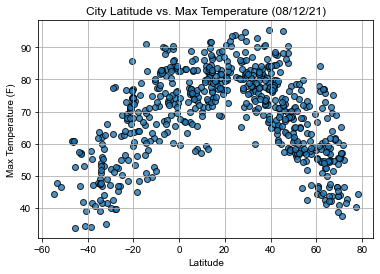

In [26]:
#Max Temp vs latitude scatterplot

plt.scatter(City_List_Info["Latitude"], 
            City_List_Info["Maximum Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# format time, add grid, set title, x-axis label, and y-label
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# export as png
plt.savefig("Output\Latitude vs Max Temperature (F).png")


In [27]:
# the negative parobolic shape of the returned data indicates that Latitutes closer
# to zero (the equator) have higher Maximum Temperatures in comparison to their
# coutnerparts who are further away from zero (the equator)

## Latitude vs. Humidity Plot

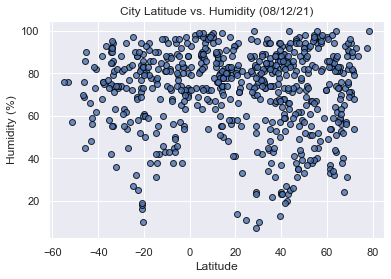

In [28]:
# Humidity vs latitude scatterplot

plt.scatter(City_List_Info["Latitude"], 
            City_List_Info["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# format time, add grid, set title, x-axis label, and y-label
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# export as png
plt.savefig("Output\Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

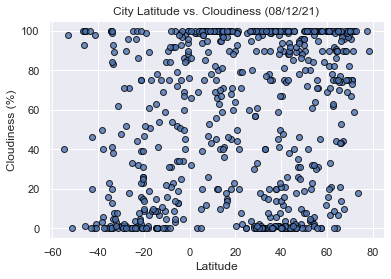

In [29]:
# Cloudiness vs Latitude scatterplot

plt.scatter(City_List_Info["Latitude"], 
            City_List_Info["Cloud Coverage"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# format time, add grid, set title, x-axis label, and y-label
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# export as png
plt.savefig("Output\Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

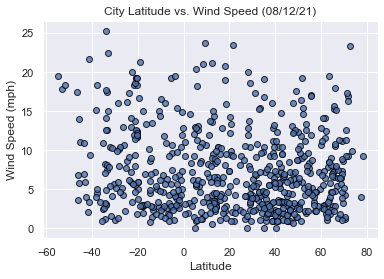

In [30]:
# Wind Speed vs latitude scatterplot

plt.scatter(City_List_Info["Latitude"], 
            City_List_Info["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# format time, add grid, set title, x-axis label, and y-label
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
sns.set()

# export as png
plt.savefig("Output\Latitude vs Wind Speed.png")

## Linear Regression

In [31]:
# create northern and southern hemisphere dataframes based on value of 
# the city's latitude
Northern_hemi_City_List_Info = City_List_Info.loc[(City_List_Info['Latitude']>0)]
Southern_hemi_City_List_Info = City_List_Info.loc[(City_List_Info['Latitude']<0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [32]:
#define the linear regression
def linear_regression(xvalues, yvalues, title, coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvalues, yvalues)
    values = xvalues * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xvalues,yvalues)
    plt.plot(xvalues,values,"r-")
    plt.annotate(line_eq, coordinates, fontsize=14, color='red')
    plt.xlabel('Latitude')
    print(f"The r value is: {rvalue}")
    plt.ylabel(title)
    

The r value is: -0.6313282916733635


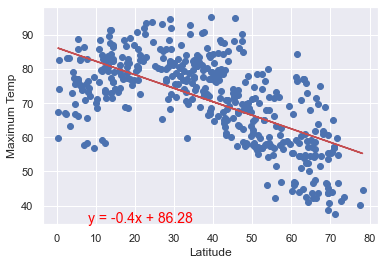

In [33]:
# set x and y values
# then apply lineaar regression defintion
xvalues = Northern_hemi_City_List_Info["Latitude"]
yvalues = Northern_hemi_City_List_Info["Maximum Temp"]
linear_regression(xvalues, yvalues, 'Maximum Temp', (8,35)) 

# export as png
plt.savefig("Output\Hemisphere Northern vs Max Temperature (F).png")

In [34]:
# r value indicates a strong negative correlation between Maxiumum Temperatures
# and Latitude values.  The further the Latitude gets away from zero, 
# lower Maximum temperatures are observed

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.7082827315727561


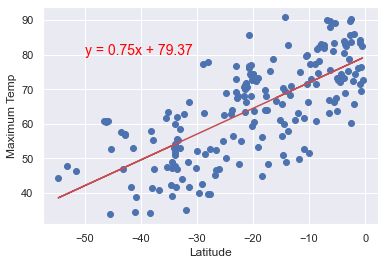

In [35]:
# set x and y values
# then apply lineaar regression defintion
xvalues = Southern_hemi_City_List_Info["Latitude"]
yvalues = Southern_hemi_City_List_Info["Maximum Temp"]
linear_regression(xvalues, yvalues, 'Maximum Temp', (-50,80)) 

# export as png
plt.savefig("Output\Hemisphere Southern vs Max Temperature (F).png")

In [36]:
# r value indicates a strong positive correlation between Maxiumum Temperatures
# and Latitude values.  The closeser the Latitude gets to zero, 
# higher Maximum temperatures are observed

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: -0.13774024317141123


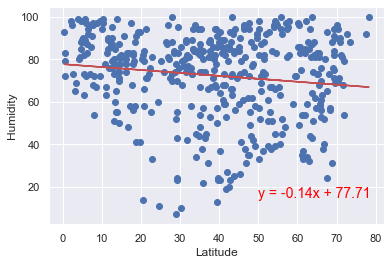

In [37]:
# set x and y values
# then apply lineaar regression defintion
xvalues = Northern_hemi_City_List_Info["Latitude"]
yvalues = Northern_hemi_City_List_Info["Humidity"]
linear_regression(xvalues, yvalues, 'Humidity', (50,15)) 

# export as png
plt.savefig("Output\Hemisphere Northern vs Humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.0045754233413368844


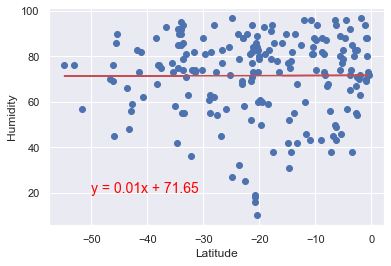

In [38]:
# set x and y values
# then apply lineaar regression defintion
xvalues = Southern_hemi_City_List_Info["Latitude"]
yvalues = Southern_hemi_City_List_Info["Humidity"]
linear_regression(xvalues, yvalues, 'Humidity', (-50,20)) 

# export as png
plt.savefig("Output\Hemisphere Southern vs Humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: -0.0319700813534231


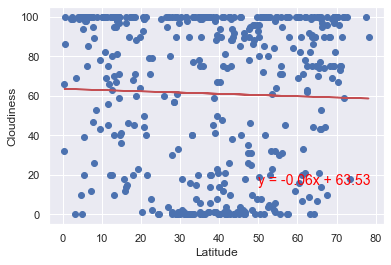

In [39]:
# set x and y values
# then apply lineaar regression defintion
xvalues = Northern_hemi_City_List_Info["Latitude"]
yvalues = Northern_hemi_City_List_Info["Cloud Coverage"]
linear_regression(xvalues, yvalues, 'Cloudiness', (50,15)) 

# export as png
plt.savefig("Output\Hemisphere Northern vs Cloudiness.png")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.1565016456731874


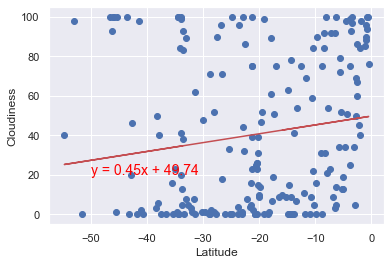

In [40]:
# set x and y values
# then apply lineaar regression defintion
xvalues = Southern_hemi_City_List_Info["Latitude"]
yvalues = Southern_hemi_City_List_Info["Cloud Coverage"]
linear_regression(xvalues, yvalues, 'Cloudiness', (-50,20))

# export as png
plt.savefig("Output\Hemisphere Southern vs Cloudiness.png")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.0019356309340652338


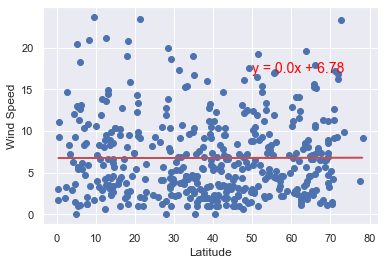

In [41]:
# set x and y values
# then apply lineaar regression defintion
xvalues = Northern_hemi_City_List_Info["Latitude"]
yvalues = Northern_hemi_City_List_Info["Wind Speed"]
linear_regression(xvalues, yvalues, 'Wind Speed', (50,17)) 

# export as png
plt.savefig("Output\Hemisphere Northern vs Wind Speed.png")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: -0.22873869728086899


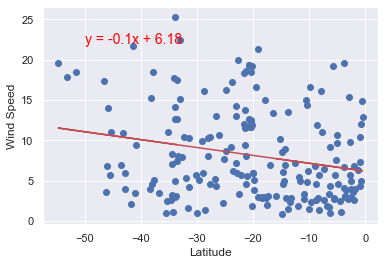

In [42]:
# set x and y values
# then apply lineaar regression defintion
xvalues = Southern_hemi_City_List_Info["Latitude"]
yvalues = Southern_hemi_City_List_Info["Wind Speed"]
linear_regression(xvalues, yvalues, 'Wind Speed', (-50,22))

# export as png
plt.savefig("Output\Hemisphere Southern vs Wind Speed.png")
